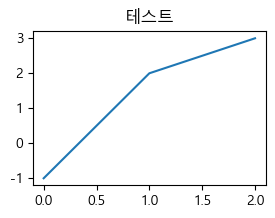

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

In [6]:
data_2022 = pd.read_csv("2022.12 약국.csv")
data_2023 = pd.read_csv("2023.12 약국.csv")
data_2024 = pd.read_csv("2024.12 약국.csv")
data_2025 = pd.read_csv("2025.03 약국.csv")

### 💊분석주제
최근 약국 개업 및 폐업 추세 분석을 통한 보건의료 접근성 변화 진단
> 최근 몇 년간 고령화, 지역 의료 공백, 의료기관 폐업 등의 사회적 변화 속에서 지역 내 약국 접근성 문제가 점점 중요해지고 있음. 특히 지방 소멸 위험 지역과 심야 시간대 약국 부족 문제가 언론과 정책 영역에서 반복적으로 지적되고 있음.  
- 사용 데이터 : 2022~2025 전국 약국 현황
    https://opendata.hira.or.kr/op/opc/selectOpenData.do?sno=11925&publDataTpCd=&searchCnd=ttl&searchWrd=%EC%A0%84%EA%B5%AD&pageIndex=1

### 1. 신규 약국 개업 추이 분석

**📌 주요 특징 요약**
- 2000년대 중반부터 급격한 증가  
    - 2010년 이후부터 약국 개업이 본격적으로 증가함
    - 특히 2016~2019년 사이에 정점을 찍음, 연간 5천 개 이상 개업
- 2019년 이후 급감  
    - 2020년부터 개업 수가 빠르게 감소하는 추세
    - 코로나19 팬데믹(2020~2022년)이 주요 원인으로 추정됨

> 약국 개업은 2010년대에 급격히 증가했다가, 최근 몇 년간 다시 줄어드는 추세. 이는 약국 산업이 포화 상태에 접어들었거나, 팬데믹과 규제 변화 등의 영향일 수 있음

In [7]:
# 수집시점 컬럼 추가

data_2022['수집시점'] = '2022.12'
data_2023['수집시점'] = '2023.12'
data_2024['수집시점'] = '2024.12'
data_2025['수집시점'] = '2025.03'

In [8]:
# 데이터 병합
df_all = pd.concat([data_2022, data_2023, data_2024, data_2025], ignore_index=True)

# 개설일자 처리(연도 추출)
df_all['개설일자'] = df_all['개설일자'].astype(str).str[:8]
df_all['개설일자'] = pd.to_datetime(df_all['개설일자'], format='%Y%m%d', errors='coerce')
df_all['개설연도'] = df_all['개설일자'].dt.year

# 연도별 개업 수 집계
개업추이 = df_all['개설연도'].value_counts().sort_index()
print(개업추이)

개설연도
1959.0       4
1960.0       4
1961.0      13
1962.0      18
1963.0      27
          ... 
2020.0    3524
2021.0    3296
2022.0    3626
2023.0    2323
2024.0    1123
Name: count, Length: 66, dtype: int64


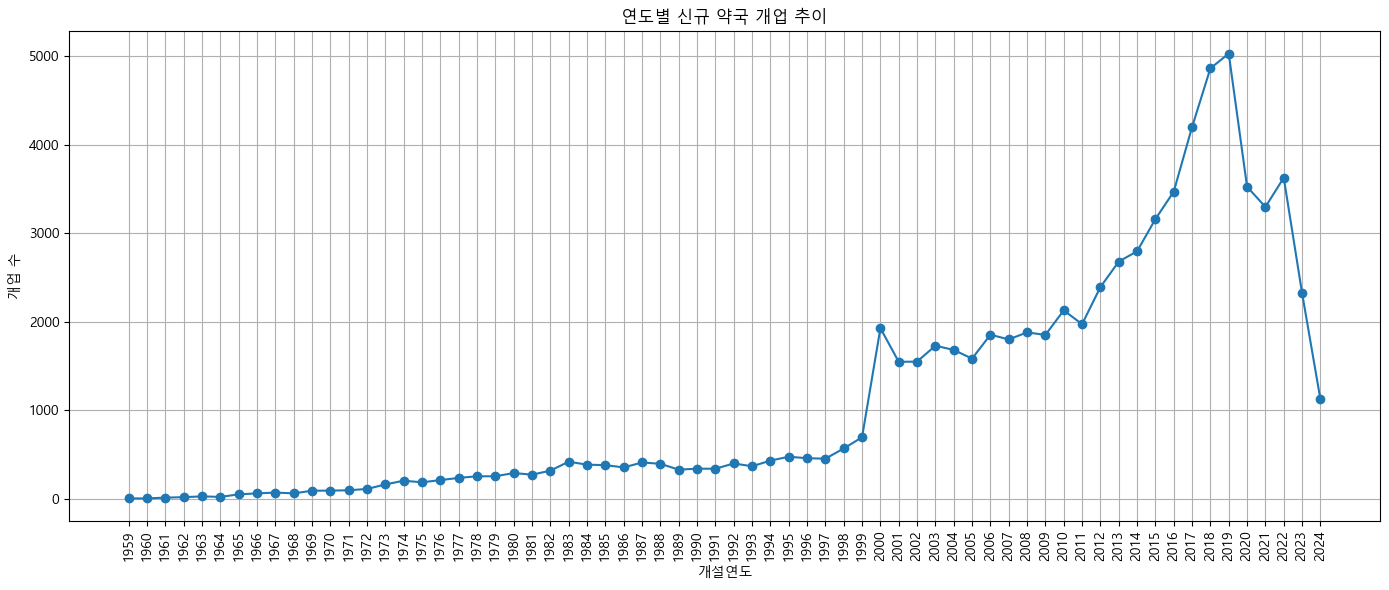

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(개업추이.index, 개업추이.values, marker='o')
plt.title('연도별 신규 약국 개업 추이')
plt.xlabel('개설연도')
plt.ylabel('개업 수')
plt.grid(True)

# x축을 연도 단위로 세밀하게 설정
plt.xticks(
    ticks=range(int(개업추이.index.min()), int(개업추이.index.max()) + 1, 1),
    rotation=90
)

plt.tight_layout()
plt.show()

### 2. 지역별 약국 개업 현황 비교

**📌 연도별 약국 개업 추이 (상위 6개)**
- 경기와 서울이 개업 수에서 압도적
    - 두 지역 모두 2010년대 중후반까지 지속적으로 개업 수 증가
    - 특히 2018년에는 서울·경기에서만 연간 1,200곳 이상 개업

- 부산은 3위권 유지
    - 부산도 꾸준히 개업이 있었지만 서울·경기에 비해 규모는 확연히 작음

- 대구, 인천, 경남 등 비수도권은 100~300선 유지
    - 코로나 이후 모두 동반 하락
    - 감소폭은 수도권보다 완만하지만, 전국적 하락세 공통점 존재

- 수도권 포함 전국적 약국 개업 수 하락 추세
- 팬데믹, 포화시장, 수익성 저하 등이 원인으로 추정됨

> 약국 개업은 수도권 집중 현상이 뚜렷하며, 비수도권은 규모 작고 개업 속도도 상대적으로 낮음. 최근에는 전국적으로 개업 수가 줄고 있어 약국 산업이 전환기를 맞고 있음

In [12]:
시도별_개업 = df_all.groupby(['시도코드명', '개설연도']).size().unstack(fill_value=0)

In [13]:
상위시도 = 시도별_개업.sum(axis=1).sort_values(ascending=False).head(6).index
시도별_개업_상위6 = 시도별_개업.loc[상위시도]

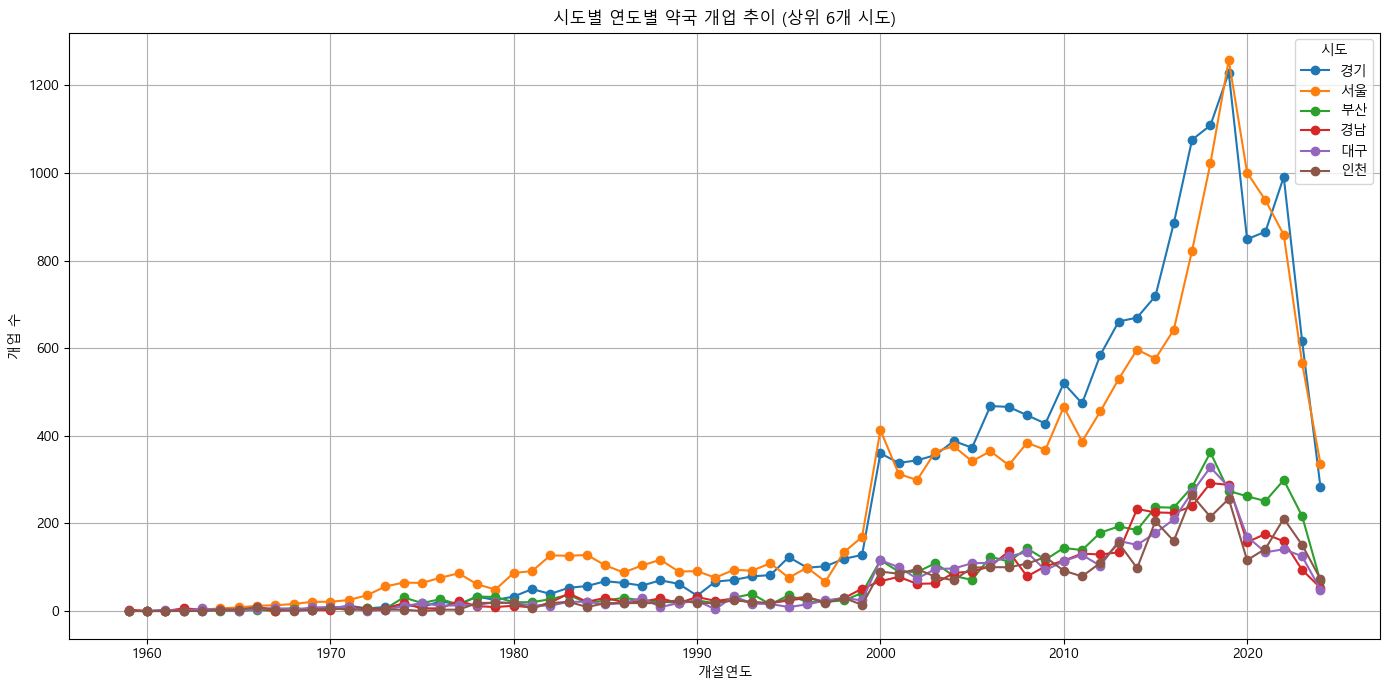

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for 시도 in 시도별_개업_상위6.index:
    plt.plot(시도별_개업_상위6.columns, 시도별_개업_상위6.loc[시도], marker='o', label=시도)

plt.title('시도별 연도별 약국 개업 추이 (상위 6개 시도)')
plt.xlabel('개설연도')
plt.ylabel('개업 수')
plt.legend(title='시도')
plt.grid(True)
plt.tight_layout()
plt.show()


### 3. 약국 폐업 추정 및 생존 현황 분석


📌 2022년에 존재했던 약국 중, 2025년 기준으로 약 6.1%가 폐업한 것으로 추정됨

- 폐업 비율: 6.1%
    - 2022년에는 운영 중이었지만, 2025년 데이터에서는 더 이상 나타나지 않는 약국

- 약국은 단기간에 폐업률이 낮은 편이며 비교적 안정적인 업종으로 보임
    - 하지만 3년 사이에도 약 6%의 약국이 사라졌다는 점은, 지역별 수익성, 운영 부담 등이 일부 영향을 미쳤을 수 있음

📌 폐업률이 가장 높은 지역은 서울(5.3%)
- 전국 평균인 6.1%보다는 낮지만, 전국에서 가장 높은 폐업률
- 약국 경쟁이 가장 치열하고, 공공심야약국 확대 등 제도 변화가 활발한 지역
- 높은 임대료, 포화된 상권, 온라인 약 배달 도입 가능성 등 영향 추정됨

In [15]:
data_2022_names = set(data_2022['요양기관명'])
data_2025_names = set(data_2025['요양기관명'])

In [16]:
폐업_추정 = data_2022_names - data_2025_names

In [17]:
폐업수 = len(폐업_추정)
전체수_2022 = len(data_2022_names)
폐업률 = round(폐업수 / 전체수_2022 * 100, 2)

print(f"2022년 기준 약국 수: {전체수_2022}")
print(f"2025년 기준 사라진 약국 수 (폐업 추정): {폐업수}")
print(f"폐업률(추정): {폐업률}%")

2022년 기준 약국 수: 10893
2025년 기준 사라진 약국 수 (폐업 추정): 667
폐업률(추정): 6.12%


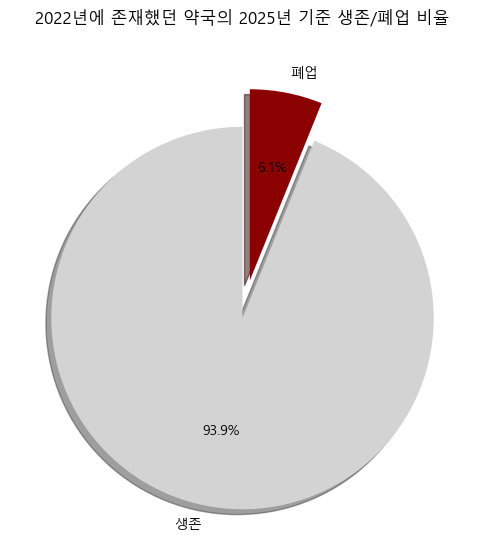

In [22]:
import matplotlib.pyplot as plt

# 값 계산
생존수 = 전체수_2022 - 폐업수

# 파이차트 데이터
labels = ['생존', '폐업']
sizes = [생존수, 폐업수]
colors = ['lightgray', 'darkred']  # 초록, 빨강
explode = (0, 0.2)  # 폐업 쪽 강조

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title('2022년에 존재했던 약국의 2025년 기준 생존/폐업 비율', y=1.08)
plt.axis('equal')  # 원형 유지
plt.show()

In [23]:
# 시도별 2022년 약국 이름 목록 만들기
시도별_2022 = data_2022.groupby('시도코드명')['요양기관명'].apply(set)

# 2025년에 살아 있는 약국 이름 set 만들기
data_2025_names = set(data_2025['요양기관명'])

# 시도별 폐업률 계산
지역_폐업_비율 = {}

for 시도, 약국셋 in 시도별_2022.items():
    전체수 = len(약국셋)
    생존수 = len(약국셋 & data_2025_names)  # 교집합
    폐업수 = 전체수 - 생존수
    폐업률 = round(폐업수 / 전체수 * 100, 2) if 전체수 > 0 else 0
    지역_폐업_비율[시도] = 폐업률

# 정렬해서 상위 지역 보기
import pandas as pd

폐업률_df = pd.DataFrame.from_dict(지역_폐업_비율, orient='index', columns=['폐업률(%)'])
폐업률_df = 폐업률_df.sort_values(by='폐업률(%)', ascending=False)
print(폐업률_df.head(10))  # 폐업률 높은 상위 10개 시도

     폐업률(%)
서울     5.36
광주     4.90
경기     4.73
부산     4.58
세종시    4.43
충남     3.94
경남     3.51
인천     3.36
전북     3.31
대전     3.21


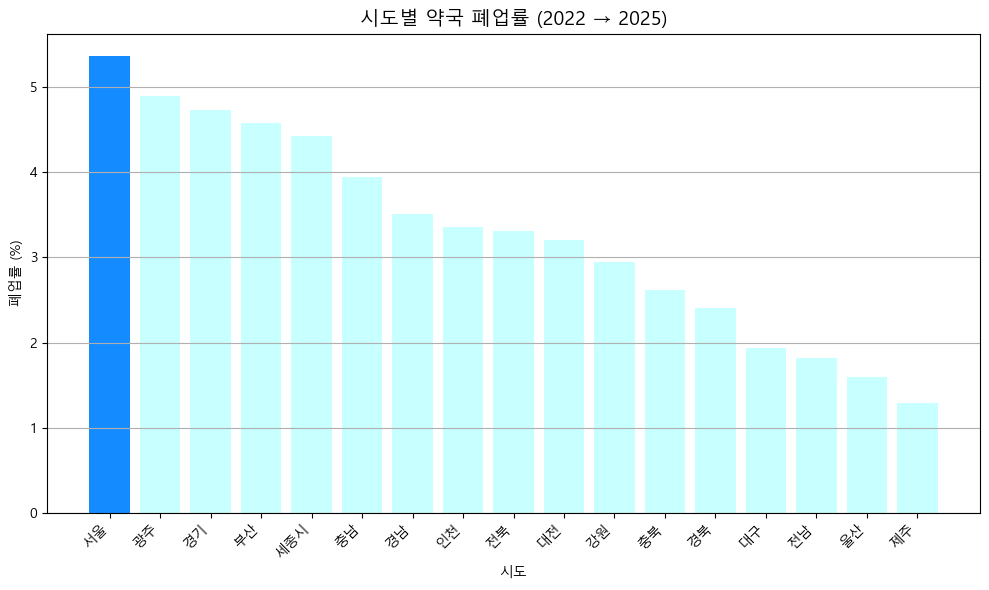

In [31]:
# 시도별 약국명 집합 생성 (2022년 기준)
시도별_2022 = data_2022.groupby('시도코드명')['요양기관명'].apply(set)

# 2025년 전체 약국명 집합
data_2025_names = set(data_2025['요양기관명'])

# 시도별 폐업률 계산
지역_폐업_비율 = {}
for 시도, 약국셋 in 시도별_2022.items():
    전체수 = len(약국셋)
    생존수 = len(약국셋 & data_2025_names)
    폐업수 = 전체수 - 생존수
    폐업률 = round(폐업수 / 전체수 * 100, 2) if 전체수 > 0 else 0
    지역_폐업_비율[시도] = 폐업률

# 데이터프레임으로 변환
폐업률_df = pd.DataFrame.from_dict(지역_폐업_비율, orient='index', columns=['폐업률(%)'])
폐업률_df = 폐업률_df.sort_values(by='폐업률(%)', ascending=False)

# 색상 리스트 생성: 기본은 연한 민트, 서울만 진한 파랑
colors = ['#C8FFFF'] * len(폐업률_df)
max_idx = 폐업률_df['폐업률(%)'].idxmax()  # 폐업률 가장 높은 시도 (서울일 것)
highlight_color = '#148CFF'  # 서울에 적용할 강조 색

# 해당 인덱스만 색상 바꾸기
colors[list(폐업률_df.index).index(max_idx)] = highlight_color

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(폐업률_df.index, 폐업률_df['폐업률(%)'], color=colors)
plt.title('시도별 약국 폐업률 (2022 → 2025)', fontsize=14)
plt.xlabel('시도')
plt.ylabel('폐업률 (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 4. 누적 약국 수 변화 분석

📌 누적 약국 수 변화 해석
- 2000년대 이전까지는 완만한 증가
    - 1980년대까지는 누적 약국 수 증가 속도가 매우 느림
    - 약국 개설 수 자체가 적었고, 산업 초기 안정기라고 볼 수 있음

- 2000년대 이후 가속화
    - 2000년대 초반부터 기울기가 점점 가팔라짐
    - 신규 개업 수가 증가하면서 누적 약국 수가 빠르게 늘어남

- 2015년 이후 급격한 증가
    - 2015~2020년 사이 가장 빠른 속도로 약국이 개설됨
    - 산업이 확장기 또는 과잉 진입기에 접어들었을 가능성

- 2022년 이후 증가세 둔화
    - 최근 2~3년은 기울기 변화가 둔해졌고
    - 이는 신규 개업 감소 + 일부 폐업 발생의 결과로 보임

> 약국 산업은 장기간 우상향 중으로, 전체 수는 계속 증가해 왔음. 다만 최근에는 포화 상태에 근접하거나, **외부 환경 변화(코로나, 규제 등)**로 인해 증가 속도가 줄어드는 양상.

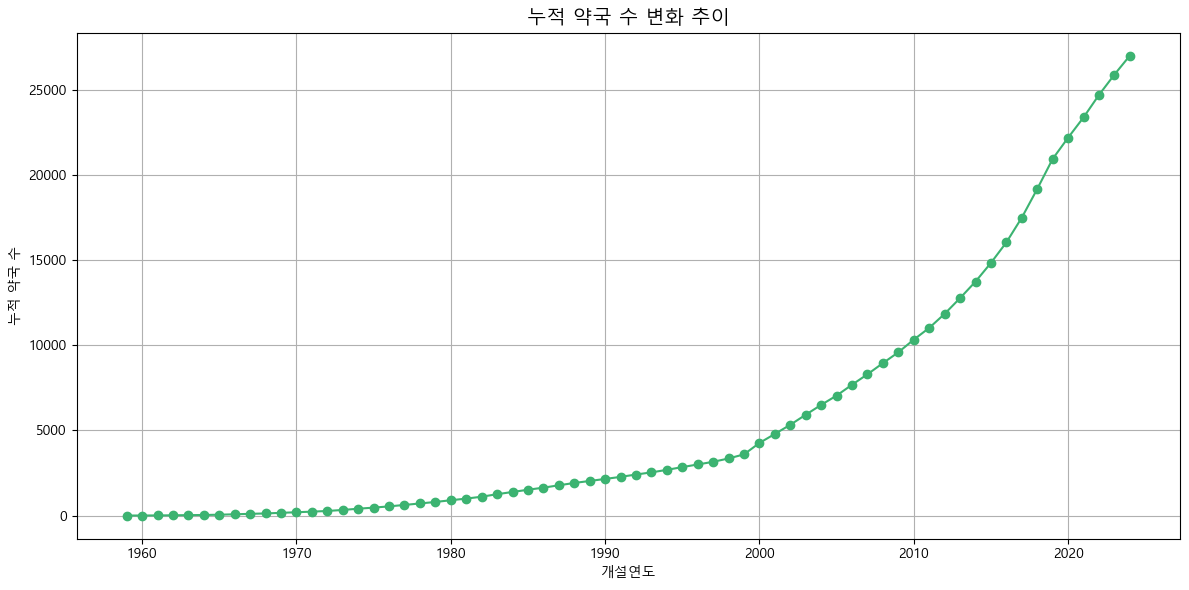

In [32]:
# 중복 제거된 약국만 유지 (요양기관명 + 개설일자 기준)
df_unique = df_all.drop_duplicates(subset=['요양기관명', '개설일자'])

# 개설연도 기준으로 연도별 개업 수 → 누적합
연도별_개업수 = df_unique['개설연도'].value_counts().sort_index()
누적개업 = 연도별_개업수.cumsum()

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(누적개업.index, 누적개업.values, marker='o', color='mediumseagreen')
plt.title('누적 약국 수 변화 추이', fontsize=14)
plt.xlabel('개설연도')
plt.ylabel('누적 약국 수')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📝결론
- 약국 산업은 장기적으로는 성장했지만 최근 들어 정체세
- 폐업률은 전체적으로 낮지만, 특정 대도시에서 상대적으로 높음
    - **서울, 광주, 경기** 등 **대도시에서 상대적으로 높은 폐업률**  
- **약국은 생존율이 높은 업종이지만, 3년 내 폐업도 적지 않음**
    - 폐업 약국 대부분이 **개설 10년 이상 생존했지만**,  **3년 내 폐업한 약국 비율도 존재**한다면 → **경쟁력 없는 진입이 많다는 신호**

> "이번 분석을 통해 약국 산업은 전체적으로 성장해왔지만, 최근 들어 신규 진입이 줄고 폐업이 발생하면서 성장세가 둔화되고 있는 추세임을 확인할 수 있었다. 특히 서울, 광주, 경기 등 대도시 지역은 폐업률이 상대적으로 높아 약국 시장의 과밀 구조가 폐업에 영향을 미쳤을 가능성이 있다. 반면 지방은 안정적인 유지율을 보이나, 신규 진입 자체가 적은 구조적 제한이 존재할 수 있다. 이러한 결과는 지역별 의료 인프라 격차를 고려한 정책 설계와 공공약국 지원 방향 설정에 유의미한 기초자료로 활용될 수 있다."